<h2><font color="#004D7F" size=6>Módulo 8. Aprenduzaje No Supervisado</font></h2>



<h1><font color="#004D7F" size=5>3. Análisis de clustering en un dataset</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<h2><font color="#004D7F" size=5>Índice</font></h2>
<a id="indice"></a>

* [1. Introducción](#section1)
    * [1.1. Librerías](#section11)
    * [1.2. Dataset](#section12)
    * [1.3. Visualización Multivariable](#section13)
        * [1.3.1. Diagrama de dispersión por clase](#section131)
        * [1.3.2. Diagrama boxplot por clase](#section132)
* [2. Técnicas de estimación de clústers](#section2)
    * [2.1. Dendograma](#section21)
    * [2.2. Método del codo](#section22)
    * [2.3. Silhouette](#section23)
* [3. Algoritmos clustering](#section3)
    * [3.1. Agglomerative](#section31)
    * [3.2. k-Means](#section31)
    * [3.3. Mean Shift](#section33)
* [4. Conclusiones](#section4)
* [Anexo A: Otra función para evaluar el método del codo](#sectionA)

In [1]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
from IPython.core.display import display, HTML
display(HTML("<style>.container{ width:98% }</style>"))

C:\Users\eel20\AppData\Local\Temp\ipykernel_25072\1126351303.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción </font>

Veamos un ejemplo de cómo puede trabajarse las técnicas de clustering en un conjunto de datos propio en Python. Para ello, vamos a probar una serie de algoritmos vistos en en la sección 1 y también a analizarlo con algunas técnicas vistas en la sección 2.

<a id="section11"></a>
## <font color="#004D7F"> 1.1. Librerías </font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id="section12"></a>
## <font color="#004D7F"> 1.2. Dataset </font>

Para este ejercicio, usaré un conjunto de datos de vinos populares. La descripción completa del conjunto de datos se puede encontrar en [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Wine), pero esencialmente si contiene resultados de un análisis químico de 3 tipos diferentes de vinos cultivados en la misma región en Italia. Supongo que los tres tipos de vino (descritos por la variable Clase en el conjunto de datos) significan blanco, rojo y rosado, pero no pude encontrar nada para confirmarlo o revelar qué Clase en los datos corresponde a qué tipo de vino. Carguemos el dataset y vamos a echar un vistazo.

In [3]:
# Constant
DATASET1 = "dataSet/wine.data"
NAMES = ['class','Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315_of_diluted_wines',
         'Proline']

##linea del curso 
#df_wine = pd.read_csv(DATASET1, sep=",", names=NAMES)

#linea mejorara por los datos con gpt4
df_wine = pd.read_csv(DATASET1, sep=",", names=NAMES, skiprows=1)
df_wine

class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color_intensity   Hue  OD280_OD315_of_diluted_wines  Proline  
0               5.64  1.04                          3.92     1065  
1               4.38  1.05                          3.40     1050  
2               5.68  1.03                          3.17     1185  
3               7.80  0.86                          3.45     1480  
4               4.32  1.04                          2.93      735  
..               ...   ...                           ...      ...  
173             7.70  0.64                          1.74      740  
174             7.30  0.70                          1.56      750  
175            10.20  0.59                          1.56      835  
176             9.30  0.60                          1.62      840  
177             9.20  0.61                          1.60      560  

[178 rows x 14 columns]

Veamos un resumen de lo que observamos:
* Todos son atributos numéricos
* Es un problema de clasificación multiclase (la clase es `class` que se encuentra en la primera columna).
* Las clase están más o menos balanceadas.
* Eliminamos la clase para poder analizarlo con clustering

In [4]:
df_wine_cluster = df_wine
print(df_wine_cluster.shape)
print()
print(df_wine_cluster.groupby('class').size())
print()

print(df_wine_cluster.dtypes)

(178, 14)

class
1    59
2    71
3    48
dtype: int64

class                             int64
Alcohol                         float64
Malic_acid                      float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
OD280_OD315_of_diluted_wines    float64
Proline                           int64
dtype: object


<a id="section13"></a>
## <font color="#004D7F"> 1.3. Visualización Multivariable </font>

Antes de analizar las técnicas de verificación de clústers y los algoritmos vamos a visualizar como se encuentran las clases. Para realizar esta visualización vamos a realizarla con un diagrama de dispersión por clase y también con un boxplot por clase.

<a id="section131"></a>
### <font color="#004D7F"> 1.3.1. Diagrama de dispersión por clase </font>

En los diagramas de dispersión por clase podremos observar como se encuentran separadas las clases por pares de atributos. En este caso podemos observar que en la mayoría de pares de atributos las clases se superponen bastante.


class                             int64
Alcohol                         float64
Malic_acid                      float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
OD280_OD315_of_diluted_wines    float64
Proline                           int64
dtype: object


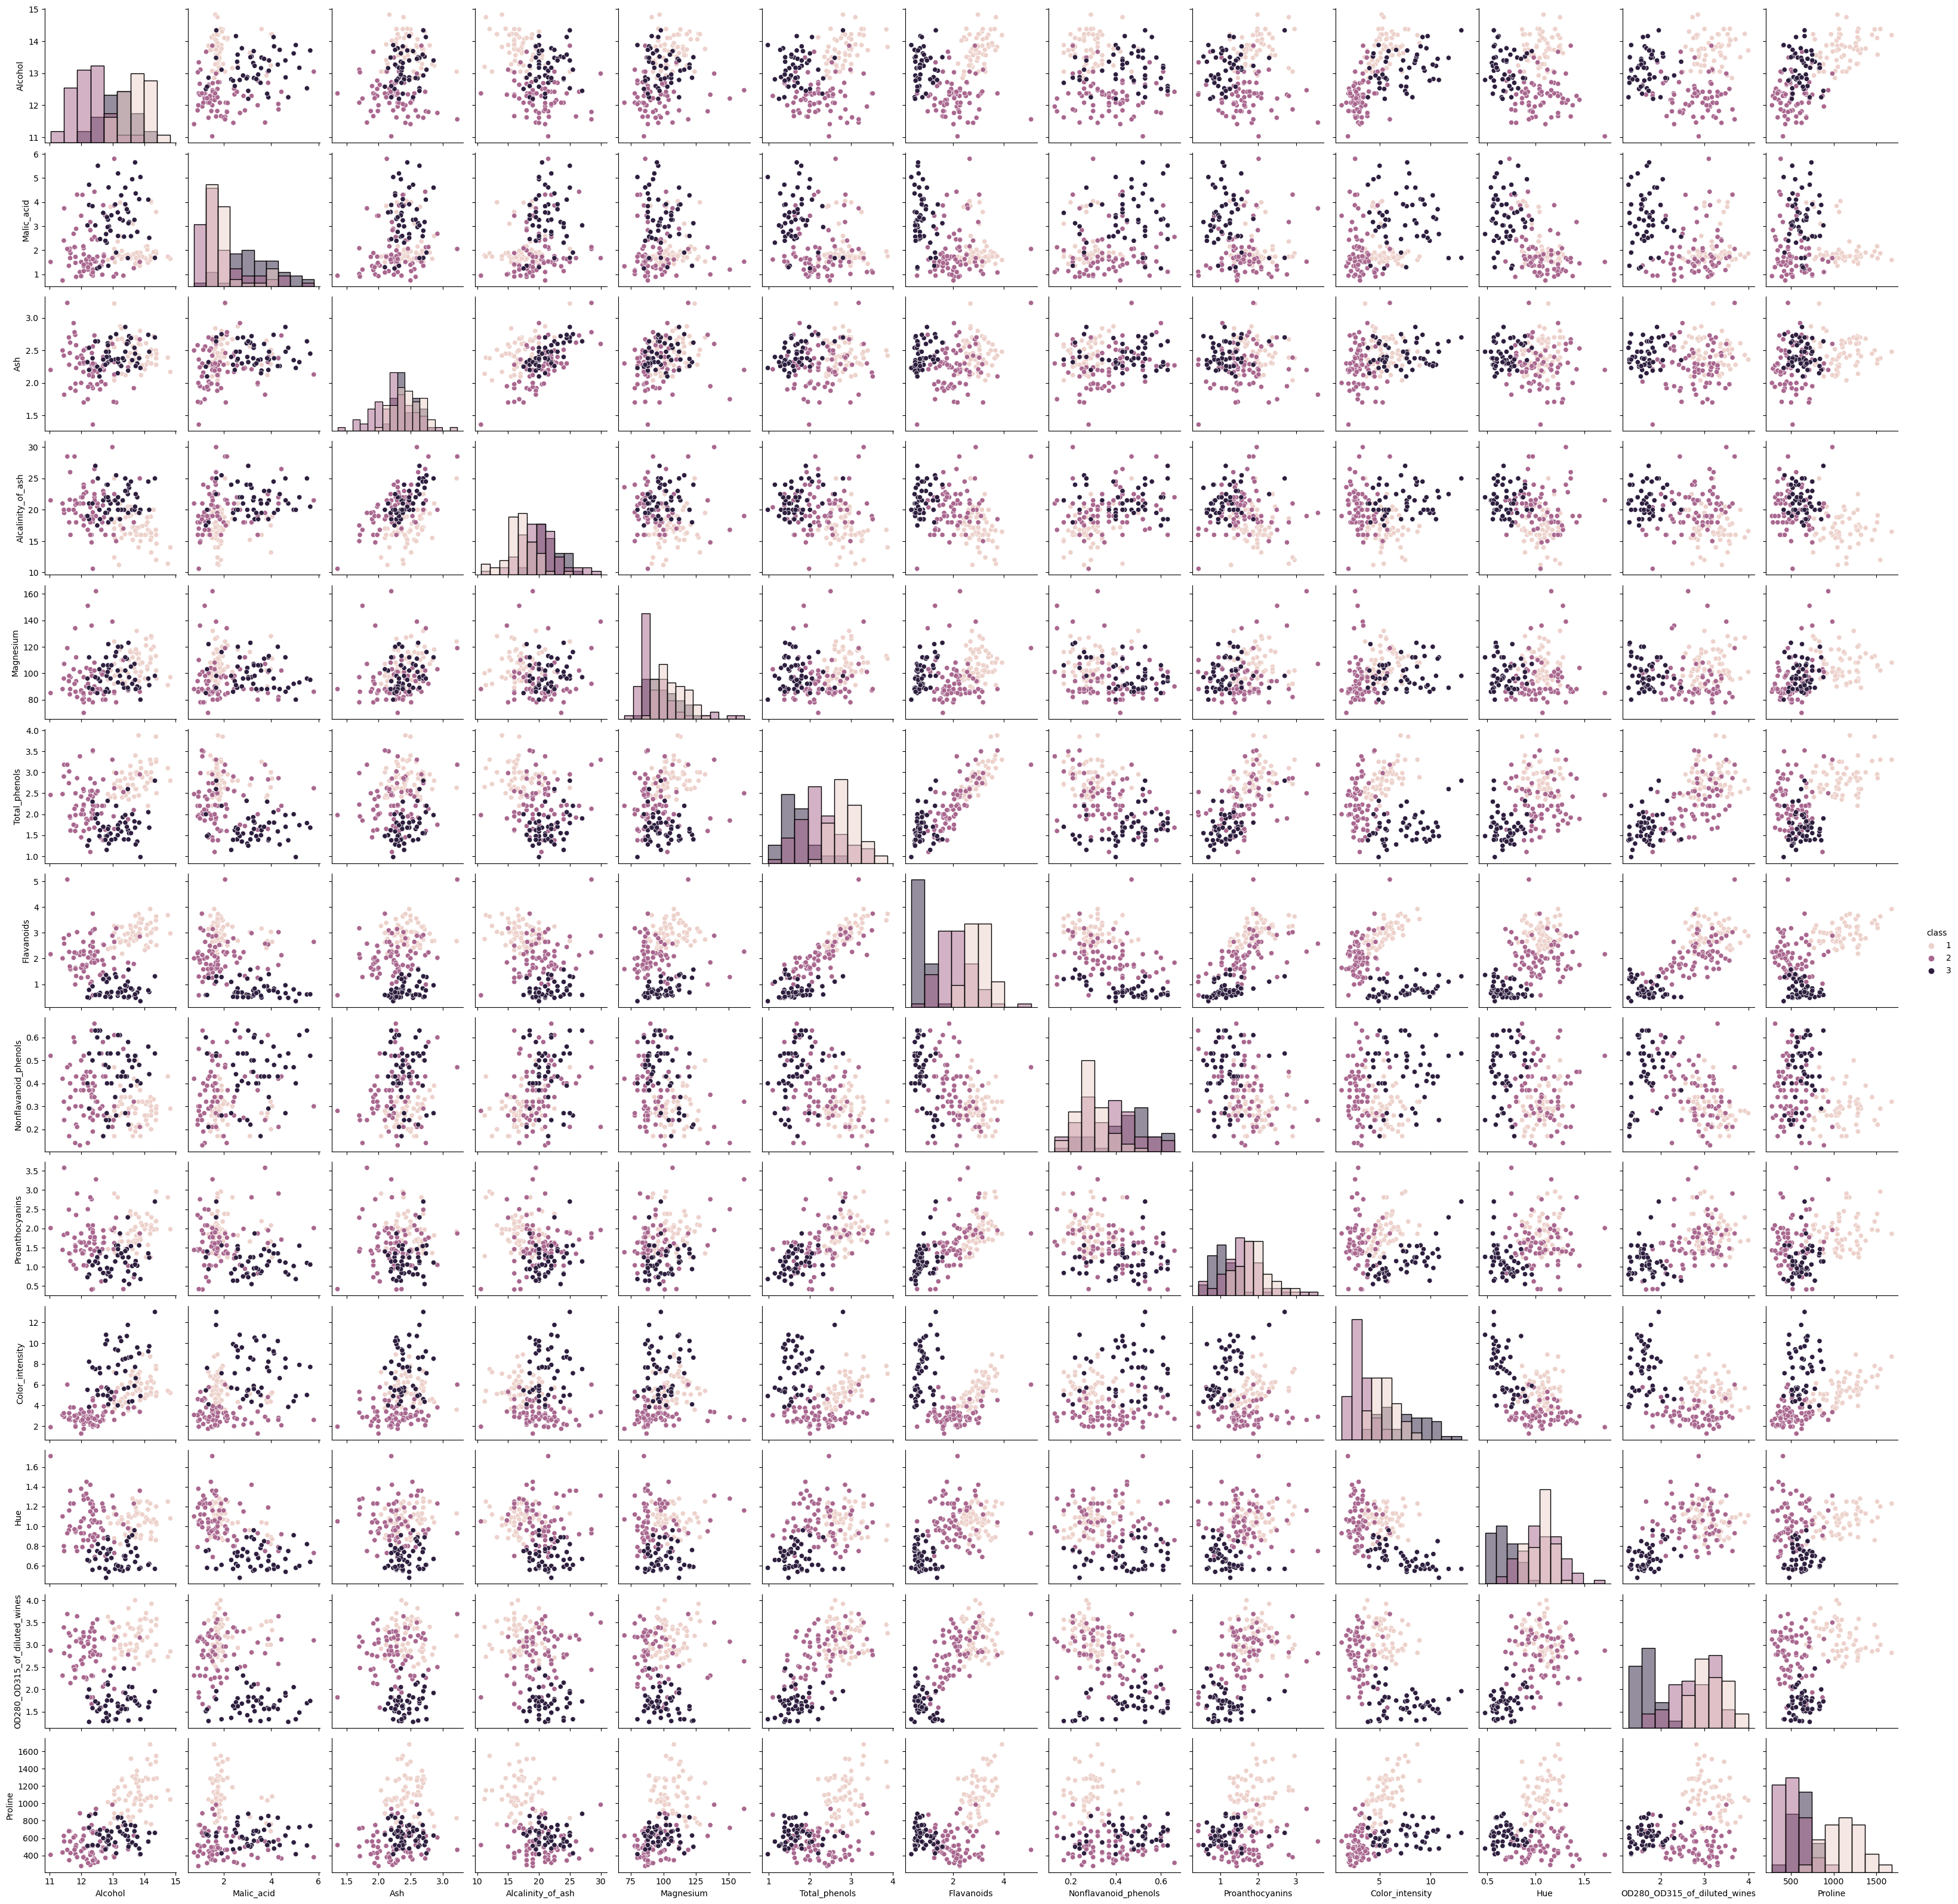

In [5]:
######### este codigo lo dio gpt 4 para poder correr la linea de abajo ###############

# Convertir columnas numéricas a tipo float
numeric_columns = df_wine_cluster.columns[1:]
df_wine_cluster[numeric_columns] = df_wine_cluster[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Verificar los tipos de datos después de la conversión
print(df_wine_cluster.dtypes)

####### hasta aqui fue ayudado por por gpt4 ######

# Ahora intenta generar el pairplot nuevamente
g = sns.pairplot(df_wine_cluster, hue="class", diag_kind="hist")


<a id="section132"></a>
### <font color="#004D7F"> 1.3.2. Diagrama boxplot por clase </font>

Los boxplots son también una buena herramienta de visualización para analizar como se distribuye la clase para cada característica en particular. Así podemos ver si las diferentes clases se encuetran correctamente diferenciadas numéricamente y no se suponerponen una franja numérica entre ellas.

Por ejemplo, en este caso podemos ver cómo `Total_phenols` se encuentra bien diferenciada numéricamente, mientras en la característica `Ash` se encuentran las diferentes clases superpuestas.

C:\Users\eel20\AppData\Local\Temp\ipykernel_25072\304541548.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(421)


<Figure size 640x480 with 0 Axes>

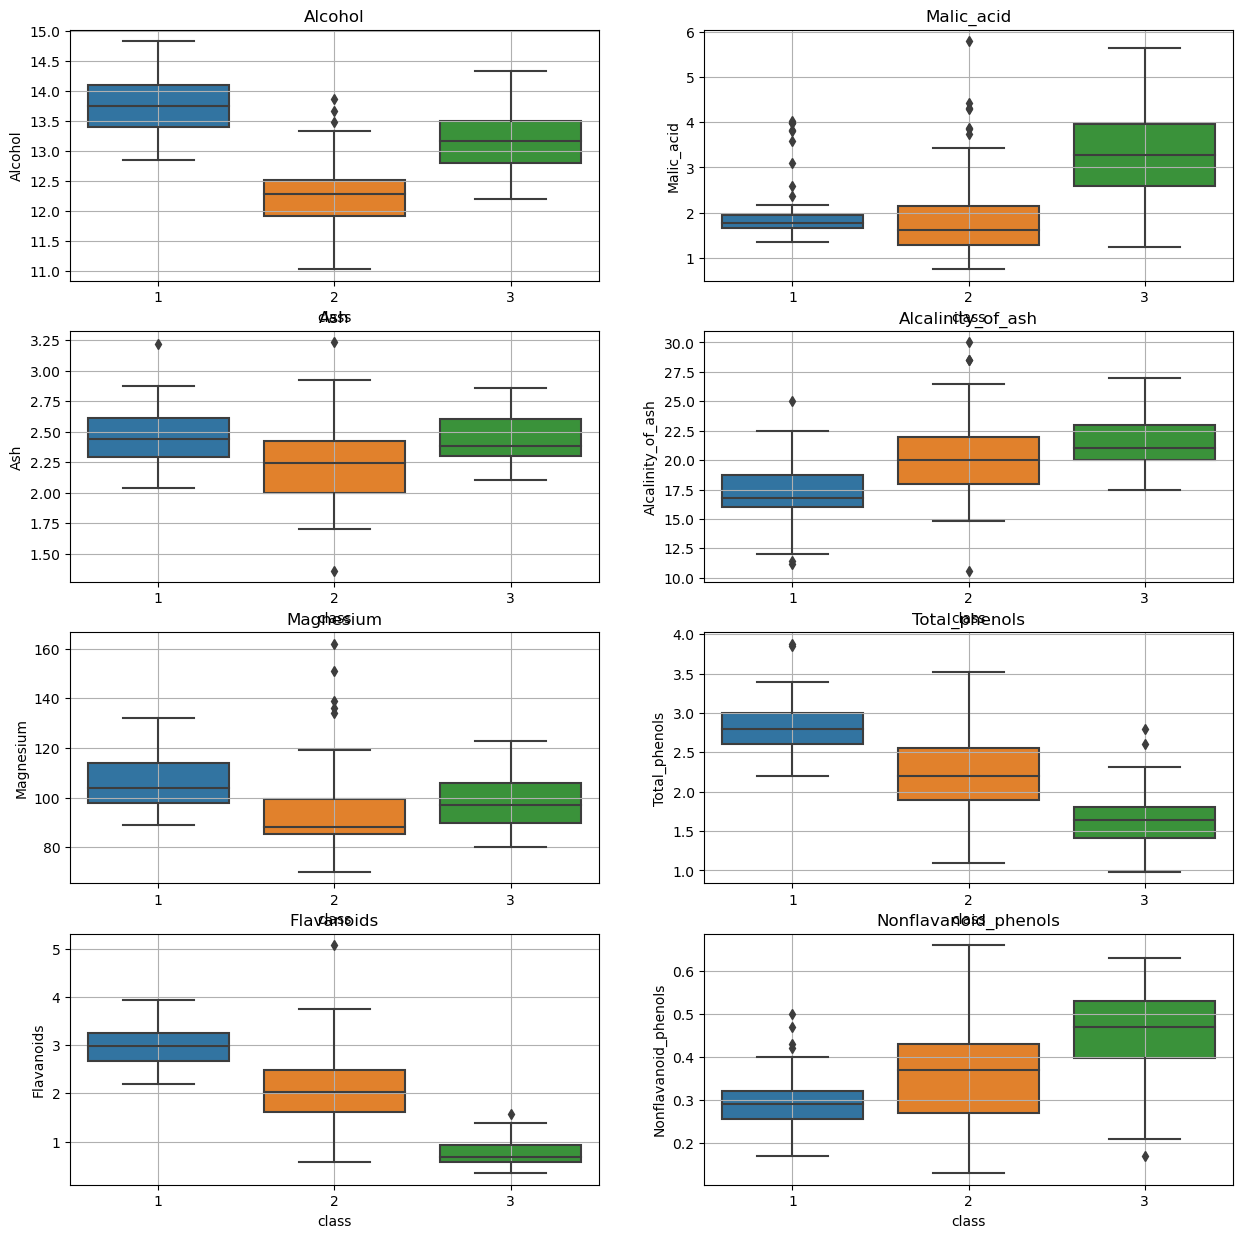

In [6]:
plt.figure(1)
plt.subplots(figsize=(15,15))
plt.subplot(421)
sns.boxplot(x='class',  y='Alcohol', data=df_wine_cluster)
plt.title('Alcohol')
plt.grid(True)
plt.subplot(422)
sns.boxplot(x='class',  y='Malic_acid', data=df_wine_cluster)
plt.title('Malic_acid')
plt.grid(True)
plt.subplot(423)
sns.boxplot(x='class',  y='Ash', data=df_wine_cluster)
plt.title('Ash')
plt.grid(True)
plt.subplot(424)
sns.boxplot(x='class',  y='Alcalinity_of_ash', data=df_wine_cluster)
plt.title('Alcalinity_of_ash')
plt.grid(True)
plt.subplot(425)
sns.boxplot(x='class',  y='Magnesium', data=df_wine_cluster)
plt.title('Magnesium')
plt.grid(True)
plt.subplot(426)
sns.boxplot(x='class',  y='Total_phenols', data=df_wine_cluster)
plt.title('Total_phenols')
plt.grid(True)
plt.subplot(427)
sns.boxplot(x='class',  y='Flavanoids', data=df_wine_cluster)
plt.title('Flavanoids')
plt.grid(True)
plt.subplot(428)
sns.boxplot(x='class',  y='Nonflavanoid_phenols', data=df_wine_cluster)
plt.title('Nonflavanoid_phenols')
plt.grid(True)
plt.show()

Teniendo en mente el análisis anterior, vamos a intentar separar mejor las diferentes clases con los diferentes algoritmos de Machine Learning.

**NOTA**: El conjunto de datos en sí no puede permitir esta segmentación ya que se supone que las muestras están recogidas correctamente. Esto quiere decir que no se puede alterar la clase ya que si un vino es Tinto no podemos reconfigurarlo a nuestra necesidad a Rosado. Es un ejercicio didáctictico imaginando que no se conocía de antemano la clase de vino.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

In [7]:

df_wine_cluster.head(1)


class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0            2.8        3.06                  0.28             2.29   

   Color_intensity   Hue  OD280_OD315_of_diluted_wines  Proline  
0             5.64  1.04                          3.92     1065

<a id="section2"></a>
# <font color="#004D7F"> 2. Técnicas de estimación de clústers</font>

En este apartado vamos a ver algunas funciones sobre las técnicas de análisis de clústering que tenemos para luego poder evaluar el desarrollo de cada uno de los algoritmos que vayamos viendo.

<a id="section21"></a>
## <font color="#004D7F"> 2.1. Dendograma </font>

La agrupación jerárquica generalmente se usa para comprender mejor la estructura y las relaciones en sus datos y, en función de ellos, usted decide qué cantidad de agrupaciones parece apropiada para su propósito. 

¿Cómo elegir el número óptimo de clústeres en función de la salida de este análisis, el dendograma? Como regla general, busque los grupos con las "ramas" más largas, cuanto más cortas son, más similares son a las "ramitas" y "hojas". Pero tenga en cuenta que, como siempre, el número óptimo también dependerá del contexto, el conocimiento experto, la aplicación, etc.

En sí, este es un método muy generalista que nos permite tener una primera idea de cuántos clúster (aproximados) podrían generarse para así evaluar los algoritmos que nos arroja el número de clústers óptimos. Si nos acordamos en la sección 1, algoritmos como Spectral Clustering nos arrojaba muchos clústers por lo que a raíz de este dendograma podemos descartar esa multisegmentación. Además, este método al ser generalista no es dependiente del algoritmo que se está utilizando como pasa con el método del códo, es decir, el dendograma que nos arroja es común a cualquier algoritmo, por es es importante observar esta primera segmentación y ver el tamaño de las "ramas".

Viendo el dendograma, podemos ver como se crean 3 grupos principales para este conjunto de datos.

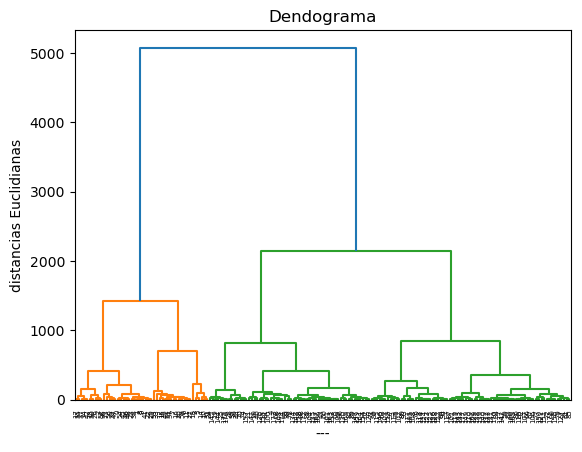

In [9]:
import scipy.cluster.hierarchy as sch

dendogram = sch.dendrogram(sch.linkage(df_wine_cluster, method='ward'))

plt.title('Dendograma')
plt.xlabel('---')
plt.ylabel('distancias Euclidianas')
plt.show()

<a id="section22"></a>
## <font color="#004D7F"> 2.2. Método del codo </font>

En resumen, el método del codo mapea la suma de cuadrados dentro del grupo en el número de grupos posibles. Como regla general, usted elige el número para el cual ve una disminución significativa en la disimilitud dentro del grupo, o lo que se conoce como "codo". 

Este método se utiliza para los algoritmos de clustering que tienen el hiperparámetro de configuración de número de clústers (como k-means); **no funcionando** con los que por defecto ya nos arroja el número de clúster óptimo (como Agglomerative). Por tanto, en el momento que analicemos cada uno de los algoritmos de manera independiente veremos la gráfica correspondiente, siempre y cuando el algoritmo aplique a esta técnica.

Veamos a continuación como es la función de este método.

In [10]:
from sklearn.metrics import pairwise_distances

def cost(data, k, centroids, clusters):
    cost = 0.0
    for c in range(k):
        points_cluster = data[clusters==c, :]
        if points_cluster.shape[0] > 0: 
            distances = pairwise_distances(points_cluster, [centroids[c]], metric='euclidean')
            cost += np.sum(distances**2)
    return cost/len(clusters)

<a id="section23"></a>
## <font color="#004D7F"> 2.3. Silhouette </font>

Las gráficas de silhouette muestran una medida de cuán cerca está cada punto en un grupo de puntos en los grupos vecinos. Esta medida varía de -1 a 1, donde 1 significa que los puntos están muy cerca de su propio grupo y lejos de otros grupos, mientras que -1 indica que los puntos están cerca de los grupos vecinos. 

Para el caso de Silhouette tenemos que ejecutarlo según cada algoritmo. A continuación se expone un ejemplo de cómo sería para k-Means aunque vamos a analizarlo en detalle en la sección de los algoritmos.

C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.6568490946514269


C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5711220218931753


C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.560572391563592


C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.548969124044004


C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.5656105961617423


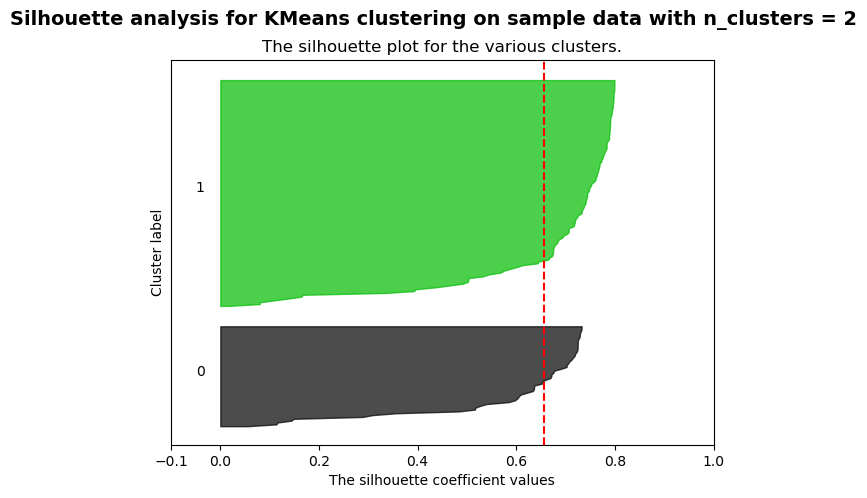

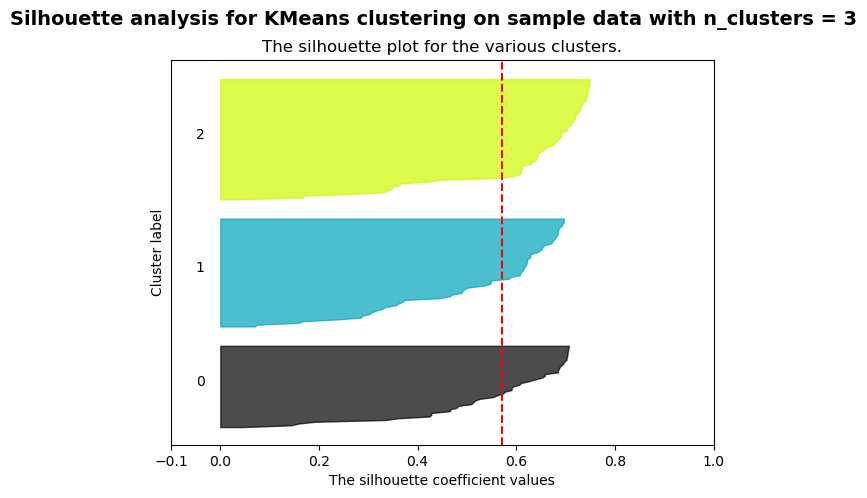

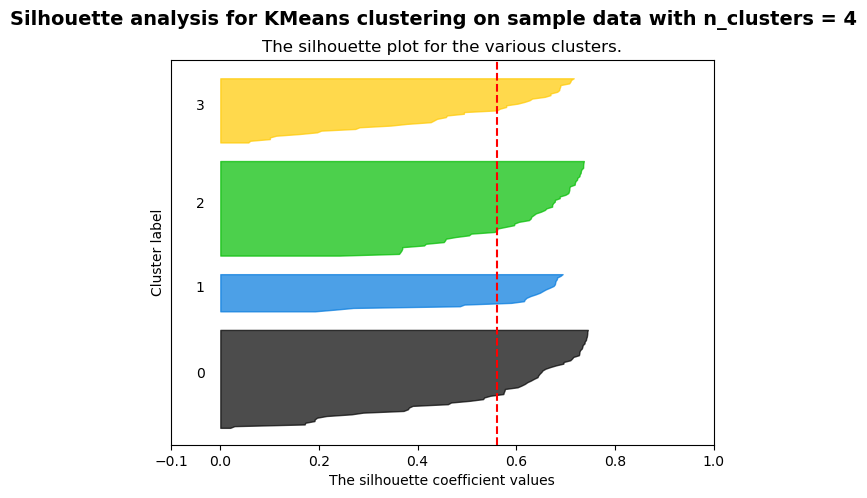

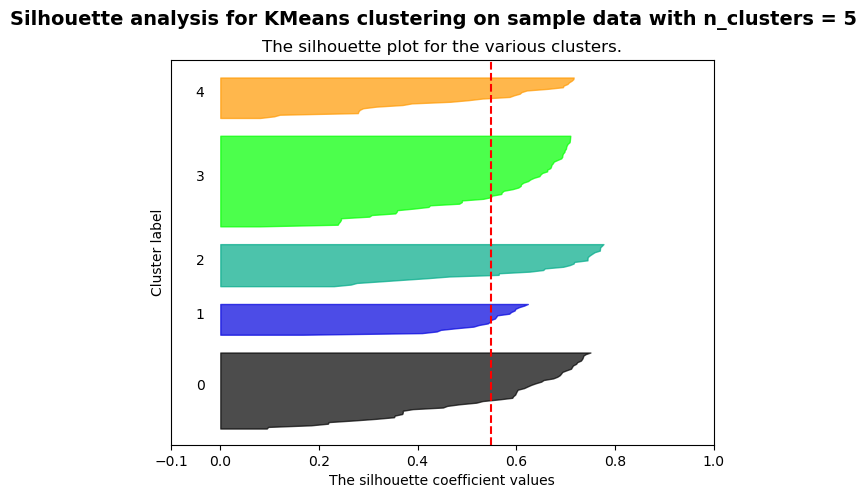

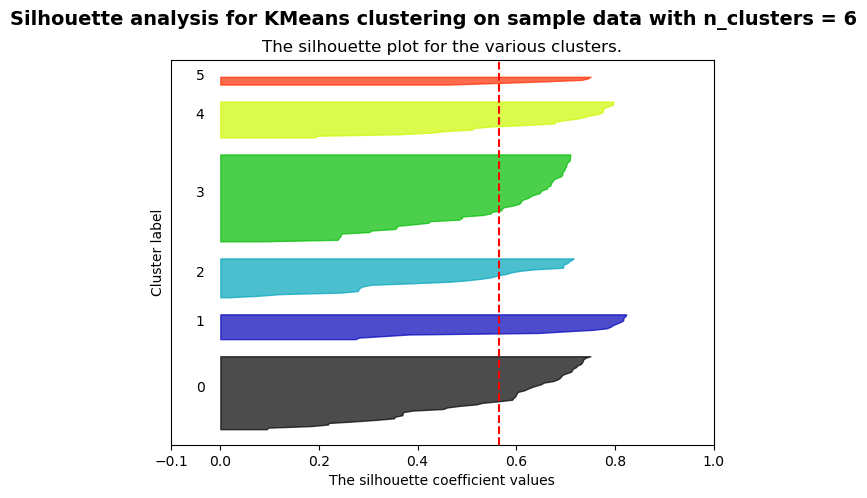

In [11]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_wine_cluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    #clusterer = algorithm
    cluster_labels = clusterer.fit_predict(df_wine_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_wine_cluster, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_wine_cluster, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

A continuación vamos a probar un conjunto de algoritmos de Machine Learning y comprobar como es su rendimiento con las diferentes técncias de análisis de los clústers formados.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Algoritmos clustering</font>

Veamos como sería la representación de cada uno de los algoritmos de Clustering. En este sentido, para todos los algoritmos se va a realizar el siguiente procedmiento:
   1. Lo primero que vamos a realizar es ver las etiquetas que nos arroja el algoritmo (label).
   2. Posteriormente, evaluar el método del codo y Silhouette.
   3. Visualizar como han quedado las clases con un diagrama de dipersión y boxplot por clase.

<a id="section31"></a>
## <font color="#004D7F"> 3.1. Agglomerative</font>

Según la documentación oficial de este algoritmo podemos modificarle el número de clústers como hiperparámetro, por tanto, este algoritmo podemos analizar el método del códo además de Silhouette.

Así vamos a ver primero cuál es el número óptimo de clústers según estos métodos.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html). 
</div> 

<a id="section311"></a>
### <font color="#004D7F"> 3.1.1. Método del codo</font>

Este es un ejemplo de para que pueda verse el error. Para realizar el método del codo necesitamos o parámetro de salida `inertia_` o como en este caso el parámetro de salida `cluster_centers_`. Para ello hay que mirar la documentación de la librería y verificar sus parámetros. 

A partir de este momento en los ejemplos posteriores solamente se pondrá el método del codo siempre y cuando pueda utilizarse.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Arrat que guardará los costes
costs = np.zeros(10,)
# Valores de k de 1 a 64
ks = 1+np.arange(10)
# Guarda los costes
#costs = np.zeros(20,)
# Valores de k de 5 a 125
#ks = np.linspace(1,20,20).astype(int)

# Ejecuta k-means para cada valor de k, y guarda el coste asociado
for i,k in enumerate(ks):
    model = ???
    ???
    centroids = ???
    clusters = ???
    costs[i] = cost(???)
    print(i,end=',')

plt.xlabel('No. Clusters')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.plot(ks,costsD, 'bo-'); 
#plt.savefig('coste.eps', format='eps', dpi=400)

<a id="section312"></a>
### <font color="#004D7F"> 3.1.2. Método Silhouette</font>

En este caso podemos ver que este algoritmo nos proporciona una mejor segmentación para 2 cluster con batante diferencia sobre 3 y 4. Pero aquí vemos un aspecto interesante en la representación gráfica y que nos dice que no siempre tenemos que fiarnos del coeficiente. Si nos fijamos en la representación gráfica vemos que el ancho de cada clúster en 3 se encuentra mejor distribuido que en 2 (que vemos mucha diferencia). Por lo que 3 es también un muy bien candidato (además de 2, claro está.)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_wine_cluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = ???
    #clusterer = algorithm
    cluster_labels = ???

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = ???
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = ???

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<a id="section313"></a>
### <font color="#004D7F"> 3.1.3. Ejecución del modelo</font>

Vamos a ejecutar el modelo con 3 clústers y ver como quedaría el label según este modelo.

Podemos ver este conjunto de datos nuevo con las etiquetas que ha establecido Agglomerative.

In [ ]:
???

Si comparamos ambos _target_ Podemos también observar que la clase 1 es la que tiene un número de instancias parecidas y la clase primera y última son las que difieren. Puede añadir las dos columnas y ver la diferencia real entre uno y otro.

In [ ]:
???

Así mismo, podemos integrar estas etiquetas que nos arroja el Algoritmo en el dataset.

In [ ]:
???

<a id="section314"></a>
### <font color="#004D7F"> 3.1.4. Visualización multivariable</font>

<a id="section4141"></a>
#### <font color="#004D7F"> Diagrama de dispersión por clase </font>

En los diagramas de dispersión por clase podremos observar como se encuentran separadas las clases por pares de atributos. En este caso podemos observar que en la mayoría de pares de atributos las clases se superponen bastante al igual que originalmente.


In [ ]:
g = sns.pairplot(df_agglomerative, hue="label", diag_kind="hist") 

<a id="section4142"></a>
#### <font color="#004D7F"> Diagrama boxplot por clase </font>

En este caso, por lo menos en estos atributos evaluados, podemos observar como teníamos originalmente una mejor segmentación que al aplicar este algoritmo.

In [ ]:
plt.figure(1)
plt.subplots(figsize=(15,15))
plt.subplot(421)
sns.boxplot(x='label',y='Alcohol',data=df_agglomerative)
plt.title('Alcohol')
plt.grid(True)
plt.subplot(422)
sns.boxplot(x='label',y='Malic_acid',data=df_agglomerative)
plt.title('Malic_acid')
plt.grid(True)
plt.subplot(423)
sns.boxplot(x='label',y='Ash',data=df_agglomerative)
plt.title('Ash')
plt.grid(True)
plt.subplot(424)
sns.boxplot(x='label',y='Alcalinity_of_ash',data=df_agglomerative)
plt.title('Alcalinity_of_ash')
plt.grid(True)
plt.subplot(425)
sns.boxplot(x='label',y='Magnesium',data=df_agglomerative)
plt.title('Magnesium')
plt.grid(True)
plt.subplot(426)
sns.boxplot(x='label',y='Total_phenols',data=df_agglomerative)
plt.title('Total_phenols')
plt.grid(True)
plt.subplot(427)
sns.boxplot(x='label',y='Flavanoids',data=df_agglomerative)
plt.title('Flavanoids')
plt.grid(True)
plt.subplot(428)
sns.boxplot(x='label',y='Nonflavanoid_phenols',data=df_agglomerative)
plt.title('Nonflavanoid_phenols')
plt.grid(True)
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section32"></a>
# <font color="#004D7F"> 3.2. K-Means</font>

Vemos ahora el resultado de aplicar un algoritmo basado en la distancia de centroides como k-means.

**NOTA**: Los métodos de clústering tienen un mejor rendimiento utilizando un escalamiento con anterioridad al análisi. Así mismo, aplicar PCA al conjunto de datos también suele establecer una mejor significativa en la conformación de clústers. Puede realizarlo y comparar los resultados.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). 
</div> 

<a id="section321"></a>
### <font color="#004D7F"> 3.2.1. Método del codo</font>

En este caso podemos observar que el método del codo utilizando k-means nos arroja un valor óptimo de un número de clúster 2 ó 3.

In [ ]:
from sklearn.cluster import KMeans

# Arrat que guardará los costes
costsD = np.zeros(10,)
# Valores de k de 1 a 64
ks = 1+np.arange(10)
# Guarda los costes
#costs = np.zeros(20,)
# Valores de k de 5 a 125
#ks = np.linspace(1,20,20).astype(int)

# Ejecuta k-means para cada valor de k, y guarda el coste asociado
for i,k in enumerate(ks):
    kmeans = ???    
    ???
    centroidsD = ???
    clustersD = ???
    costsD[i] = ???
    print(i,end=',')

plt.xlabel('No. Clusters')
plt.ylabel('Cost')
plt.title('Cost Function')
plt.plot(ks,costsD, 'bo-'); 

<a id="section322"></a>
### <font color="#004D7F"> 3.2.2. Método Silhouette</font>

En el caso de este método vemos un comportamiento muy parecido a Agglomerative. Utilizar 2 clústers nos aparece como óptimo pero 3 clústers tiene una mayor compensación en la asignación de etiquetas.

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(7, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_wine_cluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = ???
    #clusterer = algorithm
    cluster_labels = ???

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_wine_cluster, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_wine_cluster, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

   

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

<a id="section323"></a>
### <font color="#004D7F">3.2.3. Ejecución del modelo</font>

Vamos a ejecutar el modelo con 3 clústers y ver como quedaría el label según este modelo.

Podemos ver este conjunto de datos nuevo con las etiquetas que ha establecido K-Means.

In [ ]:
???

En este caso, tenemos una asignación muy diferente a la original y, también, a la de Agglomerative.

In [ ]:
???

<a id="section324"></a>
### <font color="#004D7F"> 3.2.4. Visualización multivariable</font>

<a id="section4141"></a>
#### <font color="#004D7F"> Diagrama de dispersión por clase </font>

En los diagramas de dispersión por clase podremos observar como se encuentran separadas las clases por pares de atributos. En este caso podemos observar que en la mayoría de pares de atributos las clases se superponen bastante al igual que originalmente.


In [ ]:
g = sns.pairplot(df_kmeans, hue="label", diag_kind="hist") 

<a id="section4142"></a>
#### <font color="#004D7F"> Diagrama boxplot por clase </font>

En este caso, por lo menos en estos atributos evaluados, podemos observar como teníamos originalmente una mejor segmentación que al aplicar este algoritmo.

In [ ]:
plt.figure(1)
plt.subplots(figsize=(15,15))
plt.subplot(421)
sns.boxplot(x='label',y='Alcohol',data=df_kmeans)
plt.title('Alcohol')
plt.grid(True)
plt.subplot(422)
sns.boxplot(x='label',y='Malic_acid',data=df_kmeans)
plt.title('Malic_acid')
plt.grid(True)
plt.subplot(423)
sns.boxplot(x='label',y='Ash',data=df_kmeans)
plt.title('Ash')
plt.grid(True)
plt.subplot(424)
sns.boxplot(x='label',y='Alcalinity_of_ash',data=df_kmeans)
plt.title('Alcalinity_of_ash')
plt.grid(True)
plt.subplot(425)
sns.boxplot(x='label',y='Magnesium',data=df_kmeans)
plt.title('Magnesium')
plt.grid(True)
plt.subplot(426)
sns.boxplot(x='label',y='Total_phenols',data=df_kmeans)
plt.title('Total_phenols')
plt.grid(True)
plt.subplot(427)
sns.boxplot(x='label',y='Flavanoids',data=df_kmeans)
plt.title('Flavanoids')
plt.grid(True)
plt.subplot(428)
sns.boxplot(x='label',y='Nonflavanoid_phenols',data=df_kmeans)
plt.title('Nonflavanoid_phenols')
plt.grid(True)
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section33"></a>
## <font color="#004D7F"> 3.3. Mean Shift</font>

Veamos un último ejemplo a ver el resultado que nos arroja Mean Shift. 

En el caso de este algortimo, no hay posibilidad de indicarle el número de clústers que se quieran utilizar ya que el algoritmo arroja el número óptimo según la naturaleza de los datos y su mecanismos de trabajo. Por tanto, para este caso particular, no podrá utilizarse ningún método de verificación del número de clústers, aunque si que podremos ver el coeficiente obtenido según el número de clúster que proporciona.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
Documentación oficial de la clase [`Mean Shift`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html). 
</div> 

<a id="section331"></a>
### <font color="#004D7F"> 3.3.1. Análisis Silhouette</font>

En este caso, el algoritmo Mean Shift nos arroja 3 clústers, el 0, 1 y 2. El coeficiente de Silhouette para esa conformación de clúster podemos observar que es 0.5.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score


clusterer = ???
preds = ???
#centers = clusterer.cluster_centers_

score = silhouette_score(df_wine_cluster, preds)
print("For n_clusters = {}, silhouette score is {})".format(clusterer.labels_, score))

<a id="section332"></a>
### <font color="#004D7F"> 3.3.2. Ejecución del modelo</font>

Vamos a ejecutar el modelo con 3 clústers y ver como quedaría el label según este modelo.

Podemos ver este conjunto de datos nuevo con las etiquetas que ha establecido K-Means.

In [ ]:
???

En este caso, también establece 3 clústers en nuestro conjunto de datos pero con una gran diferencia original.

In [ ]:
???

<a id="section333"></a>
### <font color="#004D7F"> 3.3.3. Visualización multivariable</font>

<a id="section4141"></a>
#### <font color="#004D7F"> Diagrama de dispersión por clase </font>

En los diagramas de dispersión por clase podremos observar como se encuentran separadas las clases por pares de atributos. En este caso podemos observar que en la mayoría de pares de atributos las clases se superponen bastante al igual que originalmente.


In [ ]:
g = sns.pairplot(df_meanshift, hue="label", diag_kind="hist") 

<a id="section4142"></a>
#### <font color="#004D7F"> Diagrama boxplot por clase </font>

En este caso, por lo menos en estos atributos evaluados, podemos observar como teníamos originalmente una mejor segmentación que al aplicar este algoritmo.

In [ ]:
plt.figure(1)
plt.subplots(figsize=(15,15))
plt.subplot(421)
sns.boxplot(x='label',y='Alcohol',data=df_meanshift)
plt.title('Alcohol')
plt.grid(True)
plt.subplot(422)
sns.boxplot(x='label',y='Malic_acid',data=df_meanshift)
plt.title('Malic_acid')
plt.grid(True)
plt.subplot(423)
sns.boxplot(x='label',y='Ash',data=df_meanshift)
plt.title('Ash')
plt.grid(True)
plt.subplot(424)
sns.boxplot(x='label',y='Alcalinity_of_ash',data=df_meanshift)
plt.title('Alcalinity_of_ash')
plt.grid(True)
plt.subplot(425)
sns.boxplot(x='label',y='Magnesium',data=df_meanshift)
plt.title('Magnesium')
plt.grid(True)
plt.subplot(426)
sns.boxplot(x='label',y='Total_phenols',data=df_meanshift)
plt.title('Total_phenols')
plt.grid(True)
plt.subplot(427)
sns.boxplot(x='label',y='Flavanoids',data=df_meanshift)
plt.title('Flavanoids')
plt.grid(True)
plt.subplot(428)
sns.boxplot(x='label',y='Nonflavanoid_phenols',data=df_meanshift)
plt.title('Nonflavanoid_phenols')
plt.grid(True)
plt.show()

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="section4"></a>
# <font color="#004D7F"> 4. Conclusiones</font>

Como hemos podido observa en estos tres algoritmos que hemos utilizado hemos obtenido un rendimiento insuficiente de separación de clases para este conjunto de datos. Aunque también hay muchos algoritmos que podemos utilizar ya que, seguramente, los utilizados aquí no han sido los óptimos.

En este sentido, y teniendo como plantilla lo que se ha expuesto aquí, se exponen las siguiente actividades:
   1. Pruebe con un escalamiento previo a utilizar las diferentes técnicas y compruebe si se mejoran los resultados.
   2. Realice un PCA previo a utilizar las diferentes técnicas para comprobar si se mejora la segmentación.
   3. Utilice otros algoritmos vistos en la teoría y compruebe si pueden mejorarse los resultados obtenidos aquí.

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<a id="sectionA"></a>
# <font color="#004D7F"> Anexo A: Otra función para evaluar el método del codo</font>

En este anexo se expone otra función para evaluar el método del codo con la propiedad de salida `inertia_`.

In [ ]:
def plot_results(inertials):
    x, y = zip(*[inertia for inertia in inertials])
    plt.plot(x, y, 'ro-', markersize=8, lw=2)
    plt.grid(True)
    plt.xlabel('Num Clusters')
    plt.ylabel('Inertia')
    plt.show()

In [ ]:
inertia_clusters = list()
loops = 9
for i in range(1, loops + 1, 1):
    # Object KMeans
    kmeans = KMeans(n_clusters=i) 

    # Calculate Kmeans
    kmeans.fit(df_wine_cluster)

    # Obtain inertia
    inertia_clusters.append([i, kmeans.inertia_])

plot_results(inertia_clusters)

<div style="text-align: right"> <font size=5>
    <a href="#indice"><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></a>
</font></div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>